<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas/blob/main/CEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/eah2016_individual.csv?raw=true')

In [47]:
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,p6_b,estado,categori,t13,t14,t18,t28,t29,t29a,t30,sem_hs,t33,t34,t35,t37_cod_2,t37_coda_2,t38,t39,t40,t41_cod_2,t47,t48,t51_bis,i1,i4,i6_3,i10,i11,codioph,ioph_2,...,codi3_otr,i3_otr_2,codnolab,ingnolab_2,coding,ingtot_2,codi_tot,itfb_2,ipcfb_2,e2,e4,e6,e8,e12,e13,e14,edad_30,nivel,aesc,m1,m1_2,m2_anio,m3_anio,tipcob2_2,sn1_1,sn1_7,sn1_2,sn1_3,sn1_4,sn1_5,s8,sn14,sn16,s28,s29,fexp,sexotexto,inmigrante,logingreso,dsex
0,1,1,1,13,resto ciudad,18,mujer,1,6,95,95,ocupado,3,0,0,0,0,0,0,2,8.0,1,1,2,9700,9,0,0,0,57314,0,0,3,1,0,2,0,0,1,1200,...,2,0,1,3000,1,4380,1,4380,4380,asiste,1,12,1,No corresponde,0,0,18,6,12,Ciudad de Bs. As.,1,0,2016,4,2,2,2,1,2,2,2,0,Excelente,2,0,973,mujer,nativo arg,8.384804,1
1,2,1,1,1,resto ciudad,18,varon,1,6,95,95,inactivo,0,2,2,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,1,9000,1,9000,1,9000,9000,asiste,3,13,1,No corresponde,0,0,17,6,12,5 País limítrofe,5,2016,2016,4,2,2,2,1,2,2,2,0,Excelente,0,0,115,varon,inmigrante,9.104980,0
2,3,1,1,6,inquilinatos hoteles inmuebles tomados,18,mujer,1,6,95,95,ocupado,3,0,0,0,0,0,0,2,32.0,1,1,1,9700,9,0,0,0,57314,0,0,3,1,0,2,0,0,1,1650,...,2,0,1,780,1,4830,1,4830,4830,asiste,1,13,11,No corresponde,0,0,18,6,12,Partido del GBA,6,0,2016,1,2,2,2,2,2,2,2,0,Excelente,2,0,223,mujer,inmigrante,8.482602,1
3,4,1,1,14,resto ciudad,18,varon,1,6,95,95,inactivo,0,2,2,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,9,15000,9,15000,9,15000,15000,asiste,2,13,1,No corresponde,0,0,18,6,12,En otra provincia,3,0,2016,4,2,2,2,1,2,2,2,0,Excelente,0,0,421,varon,nativo arg,9.615806,0
4,5,1,1,2,resto ciudad,18,varon,1,6,95,95,inactivo,0,2,2,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,1,15000,1,15000,1,15000,15000,asiste,3,13,1,No corresponde,0,0,18,6,12,Prov. de Bs. As.,2,0,2016,4,2,2,2,1,2,2,2,0,Bueno,0,0,199,varon,nativo arg,9.615806,0


In [3]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a', 'p6_b', 'estado', 'categori', 't13',
       't14', 't18', 't28', 't29', 't29a', 't30', 'sem_hs', 't33', 't34',
       't35', 't37_cod_2', 't37_coda_2', 't38', 't39', 't40', 't41_cod_2',
       't47', 't48', 't51_bis', 'i1', 'i4', 'i6_3', 'i10', 'i11', 'codioph',
       'ioph_2', 'codioph_neto', 'ioph_neto_2', 'codios', 'ios_2', 'codioa',
       'ioa_2', 'codlab', 'inglab_2', 'codi3_1x', 'i3_1x_2', 'codi3_2x',
       'i3_2x_2', 'codi3_8x', 'i3_8x_2', 'codi3_est', 'i3_est_2', 'codi3_otr',
       'i3_otr_2', 'codnolab', 'ingnolab_2', 'coding', 'ingtot_2', 'codi_tot',
       'itfb_2', 'ipcfb_2', 'e2', 'e4', 'e6', 'e8', 'e12', 'e13', 'e14',
       'edad_30', 'nivel', 'aesc', 'm1', 'm1_2', 'm2_anio', 'm3_anio',
       'tipcob2_2', 'sn1_1', 'sn1_7', 'sn1_2', 'sn1_3', 'sn1_4', 'sn1_5', 's8',
       'sn14', 'sn16', 's28', 's29', 'fexp', 'sexotexto', 'inmigrante',
       'logingreso', 'dse

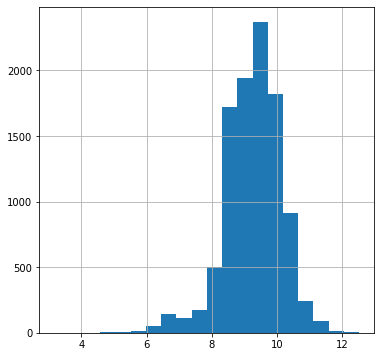

In [64]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
df.logingreso.hist(bins=20)

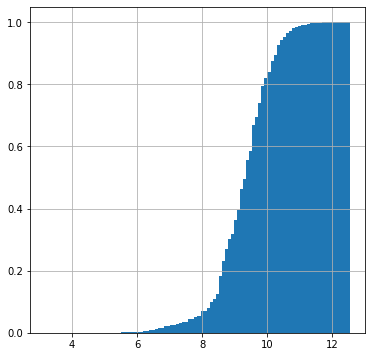

In [65]:
df.logingreso.hist(cumulative=True, density=1, bins=100)

In [7]:
df.logingreso.mean()

9.282120370355067

In [6]:
df.groupby(by='sexo').mean()

,id,nhogar,miembro,comuna,edad,parentes_2,p5_2,p6_a,p6_b,categori,t13,t14,t18,t28,t29,t29a,t30,sem_hs,t33,t34,t35,t37_cod_2,t37_coda_2,t38,t39,t40,t41_cod_2,t47,t48,t51_bis,i1,i4,i6_3,i10,i11,codioph,ioph_2,codioph_neto,ioph_neto_2,codios,...,codi3_2x,i3_2x_2,codi3_8x,i3_8x_2,codi3_est,i3_est_2,codi3_otr,i3_otr_2,codnolab,ingnolab_2,coding,ingtot_2,codi_tot,itfb_2,ipcfb_2,e4,e6,e8,e13,e14,edad_30,nivel,aesc,m1_2,m2_anio,m3_anio,tipcob2_2,sn1_1,sn1_7,sn1_2,sn1_3,sn1_4,sn1_5,s8,sn14,s28,s29,fexp,logingreso,dsex
sexo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mujer,2852.964830,1.009248,2.151101,7.184317,40.325257,2.296340,2.876254,12.131041,5.372932,1.252573,0.753550,0.750944,0.058747,0.015371,0.025270,0.024358,0.497851,15.728484,0.785984,0.101602,0.831445,3247.782728,2.544484,0.728149,0.825062,1.157483,17033.082715,0.189527,0.006513,0.546047,0.364465,0.034128,0.684382,0.187834,0.008858,1.144457,5934.236681,1.145500,5916.877817,0.151361,...,1.803699,208.336590,1.815813,284.288654,1.733620,104.275889,1.777778,160.779862,1.801876,2777.207242,2.124007,9041.541748,3.129738,27140.678390,10171.174026,0.446268,2.471669,0.849551,0.880031,0.661587,53.503061,4.914289,10.969519,2.381790,330.392601,1003.777387,2.345317,1.511788,1.827928,1.996744,1.853849,1.989188,1.978116,1.908949,0.175980,1.16061,1.293213,212.14094,9.136385,1.0
varon,2673.230139,1.010534,2.113826,7.274177,36.435845,2.152451,2.696562,12.881200,5.168691,1.544843,0.482516,0.475640,0.049744,0.014484,0.031163,0.026335,0.615069,24.057230,1.015069,0.118069,1.066423,3464.552012,2.537527,1.080176,1.322312,1.624579,24341.018581,0.308705,0.007315,0.613606,0.425896,0.025750,0.814338,0.297879,0.028530,1.517337,9459.430139,1.518508,9431.658815,0.145867,...,1.747037,225.749817,1.767228,206.244916,1.726554,21.884565,1.745574,118.383321,1.805999,1972.872860,2.215801,11897.529042,3.104462,29581.746891,10715.490124,0.488076,2.659839,1.007169,0.886028,0.879298,48.963424,4.808632,10.874177,2.208339,285.290856,911.318654,2.316752,1.532260,1.817410,1.997366,1.860424,1.988588,1.981273,1.932114,0.123482,0.00000,0.000000,209.30256,9.444136,0.0


In [5]:
df.groupby(by='sexo')['logingreso'].mean()

sexo
mujer    9.136385
varon    9.444136
Name: logingreso, dtype: float64

In [43]:
df_means=df.groupby(['sexo','aesc'],as_index=False)['logingreso'].mean()
df_means=df_means.loc[df_means.aesc<20]
#.plot(x='aesc',y='logingreso')

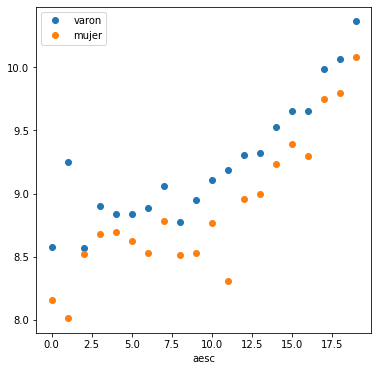

In [67]:
import matplotlib.pyplot as plt
base=df_means.loc[df_means.sexo=='varon'].plot(x='aesc',y='logingreso', style='o', label='varon')
df_means.loc[df_means.sexo=='mujer'].plot(x='aesc',y='logingreso', style='o', ax=base, label='mujer')